In [2]:
#Importing the necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from prettytable import PrettyTable
import missingno as msno
from scipy.stats import zscore as zscore
import numpy as np

In [3]:
#Loading the datasets

client_data = pd.read_csv('client_data.csv')
price_data = pd.read_csv('price_data.csv')

In [4]:
#Merging the datasets to get unified perspective over data
merged_data = pd.merge(client_data, price_data, on = 'id')

In [5]:
merged_data.shape

(175149, 33)

## Getting to know about the data:

In [6]:
merged_data.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
2  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
3  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
4  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0  6/15/2013  6/15/2016   
1         0         54946                0  6/15/2013  6/15/2016   
2         0         54946                0  6/15/2013  6/15/2016   
3         0         54946                0  6/15/2013  6/15/2016   
4         0         54946                0  6/15/2013  6/15/2016   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0       11/1/2015    6/23/2015                0.0  ...   
1       11/1/2015    6/23/2015                0.0  ...   
2       11/1/2015    6/23/2015                0.0  ...   
3       11/1/2015    6/23/2015                0.0  ...   
4       11/1/2015    6/23/2015                0.0  ...   

                          origin_up  pow_max  churn  price_date  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648      1    1/1/2015   
1  lxidpiddsbxsbosboudacockeimpuepw   43.648      1    2/1/2015   
2  lxidpiddsbxsbosboudacockeimpuepw   43.648      1    3/1/2015   
3  lxidpiddsbxsbosboudacockeimpuepw   43.648      1    4/1/2015   
4  lxidpiddsbxsbosboudacockeimpuepw   43.648      1    5/1/2015   

   price_off_peak_var  price_peak_var price_mid_peak_var  price_off_peak_fix  \
0            0.125976        0.103395           0.071536           40.565969   
1            0.125976        0.103395           0.071536           40.565969   
2            0.125976        0.103395           0.071536           40.565973   
3            0.125976        0.103395           0.071536           40.565973   
4            0.125976        0.103395           0.071536           40.565973   

   price_peak_fix  price_mid_peak_fix  
0       24.339581           16.226389  
1       24.339581           16.226389  
2       24.339578           16.226383  
3       24.339578           16.226383  
4       24.339578           16.226383  

[5 rows x 33 columns]

In [7]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175149 entries, 0 to 175148
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              175149 non-null  object 
 1   channel_sales                   175149 non-null  object 
 2   cons_12m                        175149 non-null  int64  
 3   cons_gas_12m                    175149 non-null  int64  
 4   cons_last_month                 175149 non-null  int64  
 5   date_activ                      175149 non-null  object 
 6   date_end                        175149 non-null  object 
 7   date_modif_prod                 175149 non-null  object 
 8   date_renewal                    175149 non-null  object 
 9   forecast_cons_12m               175149 non-null  float64
 10  forecast_cons_year              175149 non-null  int64  
 11  forecast_discount_energy        175149 non-null  int64  
 12  forecast_meter_r

In [8]:
date_columns = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
merged_data[date_columns] = merged_data[date_columns].apply(pd.to_datetime)

In [9]:
merged_data.head(50)

id                     channel_sales  \
0   24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1   24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
2   24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
3   24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
4   24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
5   24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
6   24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
7   24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
8   24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
9   24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
10  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
11  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
12  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
13  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
14  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
15  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
16  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
17  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
18  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
19  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
20  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
21  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
22  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
23  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
24  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
25  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
26  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
27  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
28  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
29  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
30  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
31  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
32  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
33  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
34  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
35  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
36  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
37  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
38  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
39  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
40  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
41  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
42  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
43  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
44  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
45  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
46  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
47  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
48  149d57cf92fc41cf94415803a877cb4b                           MISSING   
49  149d57cf92fc41cf94415803a877cb4b                           MISSING   

    cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0          0         54946                0 2013-06-15 2016-06-15   
1          0         54946                0 2013-06-15 2016-06-15   
2          0         54946                0 2013-06-

In [10]:
columns = merged_data.columns.to_list()
for column in columns:
    missing_count = merged_data[merged_data[column]== 'MISSING'].shape[0]
    print(f"{column} : {missing_count}")

id : 0
channel_sales : 44684
cons_12m : 0
cons_gas_12m : 0
cons_last_month : 0
date_activ : 0
date_end : 0
date_modif_prod : 0
date_renewal : 0
forecast_cons_12m : 0
forecast_cons_year : 0
forecast_discount_energy : 0
forecast_meter_rent_12m : 0
forecast_price_energy_off_peak : 0
forecast_price_energy_peak : 0
forecast_price_pow_off_peak : 0
has_gas : 0
imp_cons : 0
margin_gross_pow_ele : 0
margin_net_pow_ele : 0
nb_prod_act : 0
net_margin : 0
num_years_antig : 0
origin_up : 767
pow_max : 0
churn : 0
price_date : 0
price_off_peak_var : 0
price_peak_var : 0
price_mid_peak_var : 0
price_off_peak_fix : 0
price_peak_fix : 0
price_mid_peak_fix : 0


There are about 45k rows in 'channel_sales' column and 700rows in 'origin_up' having 'MISSING' values.

Since the number of missing values in channel_sales column is about 1/4th of the entire dataset's range, we can keep it that way instead of removing it, or we can replace it using the 'chanel_sales' value present for that specific 'id', butwe can remove the missing values in 'channel_up' values as the number is pretty insignificant.

## Data Exploration

In [11]:
# What number of customers have churned in the last 3 months?
attrition_count = merged_data['churn'].value_counts()
print('Total Number of Churned Customers:\n', attrition_count)

Total Number of Churned Customers:
 churn
0    158146
1     17003
Name: count, dtype: int64


In [12]:
# What is the proportion of customer attrition in the last 3 months?
attrition_rate = merged_data['churn'].value_counts() / merged_data.shape[0] * 100
print('Attrition rate: \n', attrition_rate)

Attrition rate: 
 churn
0    90.292265
1     9.707735
Name: count, dtype: float64


In [13]:
missing_values_main_perc = merged_data.isnull().mean() * 100
print('Percentage of Missing Values:\n', missing_values_main_perc)

Percentage of Missing Values:
 id                                0.0
channel_sales                     0.0
cons_12m                          0.0
cons_gas_12m                      0.0
cons_last_month                   0.0
date_activ                        0.0
date_end                          0.0
date_modif_prod                   0.0
date_renewal                      0.0
forecast_cons_12m                 0.0
forecast_cons_year                0.0
forecast_discount_energy          0.0
forecast_meter_rent_12m           0.0
forecast_price_energy_off_peak    0.0
forecast_price_energy_peak        0.0
forecast_price_pow_off_peak       0.0
has_gas                           0.0
imp_cons                          0.0
margin_gross_pow_ele              0.0
margin_net_pow_ele                0.0
nb_prod_act                       0.0
net_margin                        0.0
num_years_antig                   0.0
origin_up                         0.0
pow_max                           0.0
churn              

In [14]:
merged_data.describe()

cons_12m  cons_gas_12m  cons_last_month  \
count  1.751490e+05  1.751490e+05    175149.000000   
mean   1.592606e+05  2.808072e+04     16095.518404   
min    0.000000e+00  0.000000e+00         0.000000   
25%    5.674000e+03  0.000000e+00         0.000000   
50%    1.411500e+04  0.000000e+00       792.000000   
75%    4.076300e+04  0.000000e+00      3383.000000   
max    6.207104e+06  4.154590e+06    771203.000000   
std    5.735413e+05  1.629400e+05     64376.741908   

                          date_activ                       date_end  \
count                         175149                         175149   
mean   2011-01-28 04:01:02.401726720  2016-07-27 20:42:41.923847680   
min              2003-05-09 00:00:00            2016-01-28 00:00:00   
25%              2010-01-15 00:00:00            2016-04-27 00:00:00   
50%              2011-03-04 00:00:00            2016-08-01 00:00:00   
75%              2012-04-19 00:00:00            2016-10-31 00:00:00   
max              2014-09-01 00:00:00            2017-06-13 00:00:00   
std                              NaN                            NaN   

                     date_modif_prod                   date_renewal  \
count                         175149                         175149   
mean   2013-01-02 04:53:06.434407168  2015-07-21 09:21:44.825034752   
min              2003-05-09 00:00:00            2013-06-26 00:00:00   
25%              2010-08-12 00:00:00            2015-04-17 00:00:00   
50%              2013-06-17 00:00:00            2015-07-27 00:00:00   
75%              2015-06-16 00:00:00            2015-10-29 00:00:00   
max              2016-01-29 00:00:00            2016-01-28 00:00:00   
std                              NaN                            NaN   

       forecast_cons_12m  forecast_cons_year  forecast_discount_energy  ...  \
count      175149.000000       175149.000000             175149.000000  ...   
mean         1868.343884         1399.782380                  0.967028  ...   
min             0.000000            0.000000                  0.000000  ...   
25%           494.980000            0.000000                  0.000000  ...   
50%          1112.610000          314.000000                  0.000000  ...   
75%          2400.350000         1745.000000                  0.000000  ...   
max         82902.830000       175375.000000                 30.000000  ...   
std          2387.560169         3248.331276                  5.109025  ...   

          net_margin  num_years_antig        pow_max          churn  \
count  175149.000000    175149.000000  175149.000000  175149.000000   
mean      189.245305         4.998276      18.134896       0.097077   
min         0.000000         1.000000       3.300000       0.000000   
25%        50.710000         4.000000      12.500000       0.000000   
50%       112.500000         5.000000      13.856000       0.000000   
75%       243.000000         6.000000      19.180000       0.000000   
max     24570.650000        13.000000     320.000000       1.000000   
std       311.846765         1.611801      13.535809       0.296064   

       price_off_peak_var  price_peak_var  price_mid_peak_var  \
count       175149.000000   175149.000000       175149.000000   
mean             0.142331        0.052059            0.028270   
min              0.000000        0.000000            0.000000   
25%              0.126595        0.000000            0.000000   
50%              0.146788        0.084213            0.000000   
75%              0.151635        0.102114            0.072900   
max              0.280700        0.229788            0.114102   
std              0.023340        0.050286            0.036065   

       price_off_peak_fix  price_peak_fix  price_mid_peak_fix  
count       175149.000000   175149.000000       175149.000000  
mean            42.929009        9.458953            6.096434  
min              0.000000        0.000000            0.000000  
25%             40.728885        0.000000         

<Axes: >

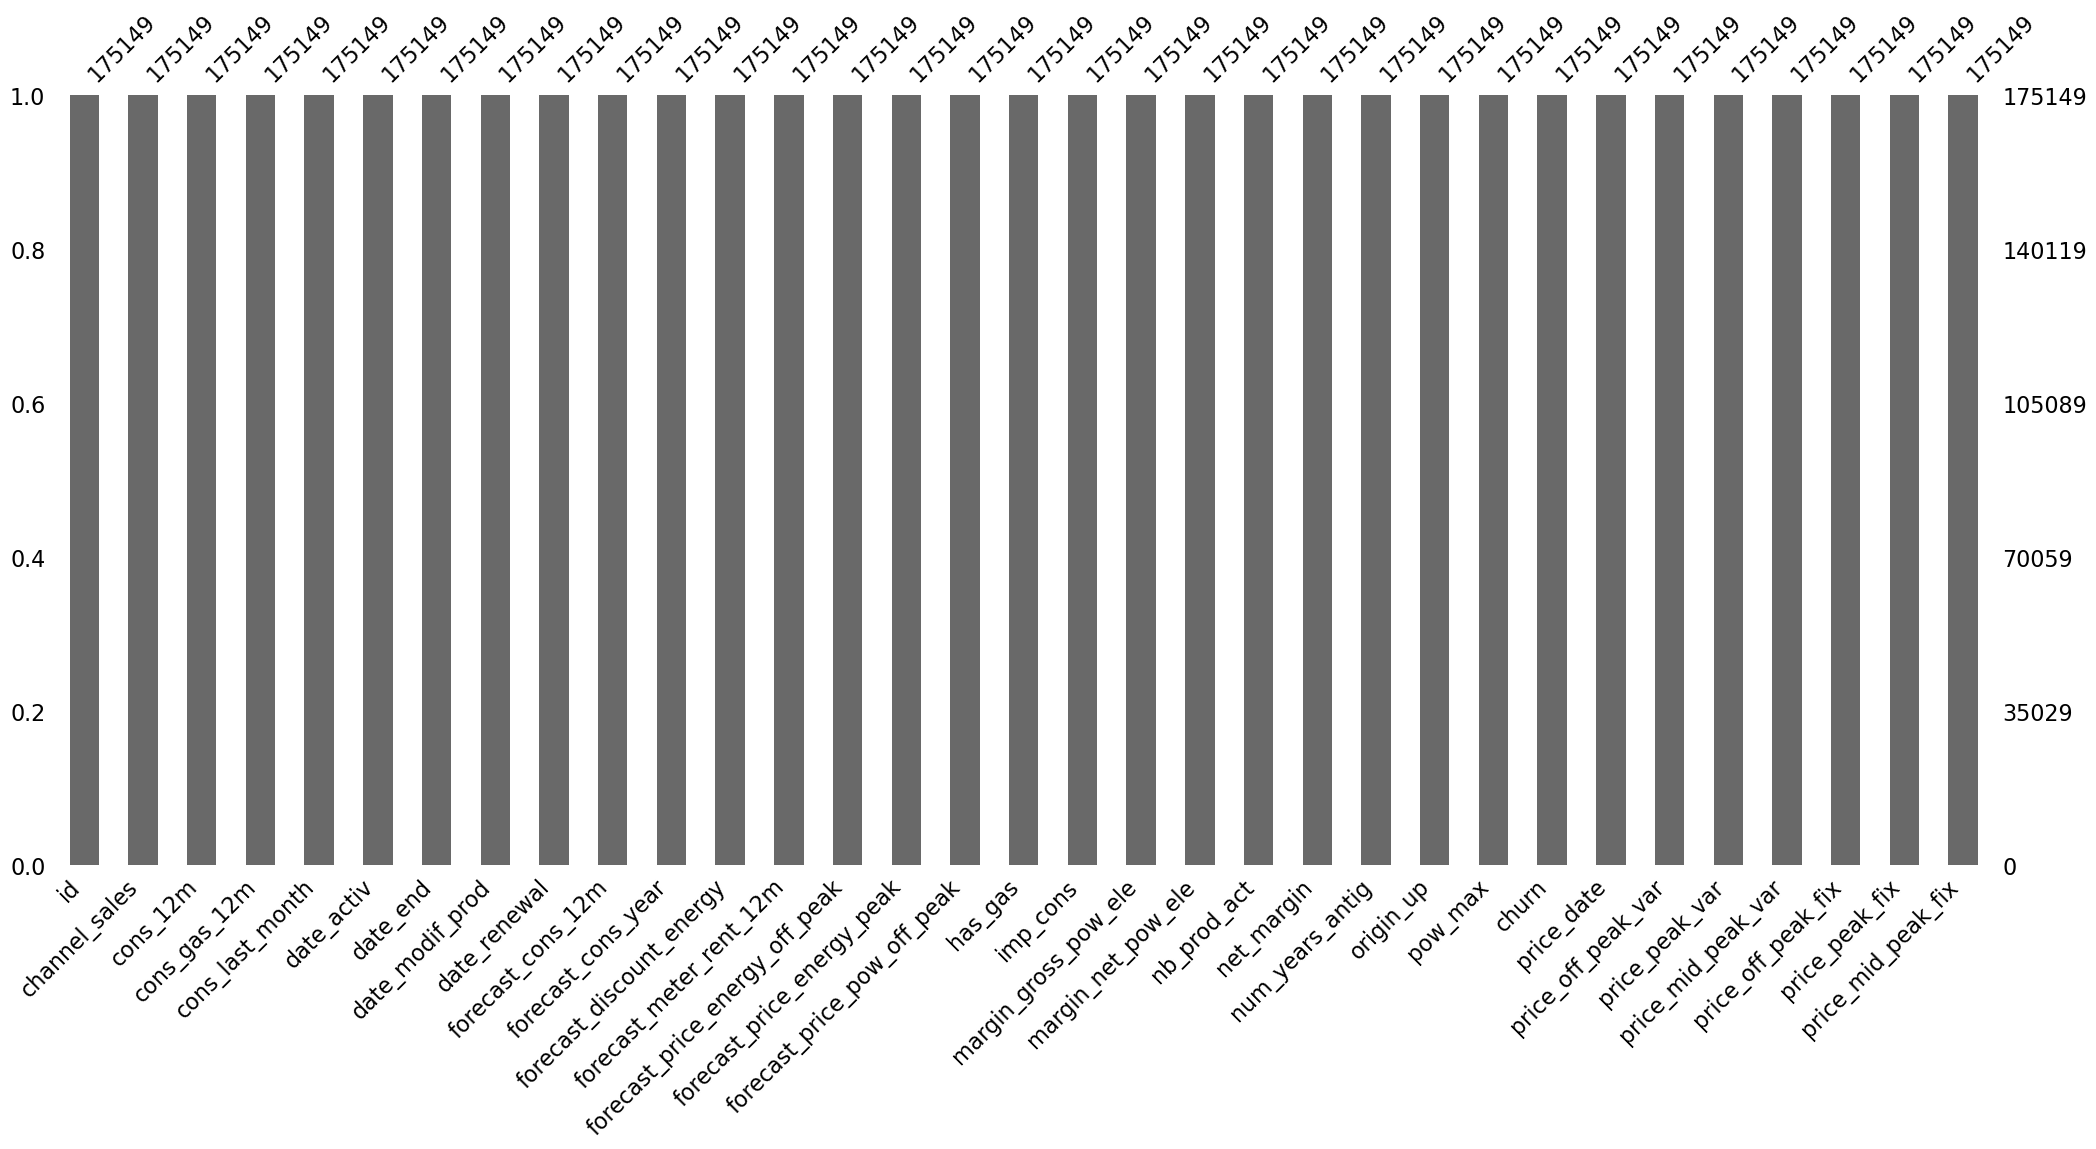

In [15]:
# Visualize the completeness of the dataframe
msno.bar(merged_data)

In [16]:
# non_b_value = merged_data['channel_sales'].loc[merged_data['channel_sales'] != 'MISSING'].iloc[0]
# def replace_miss_values(df):
#     # Group the dataframe by 'id' and get the most common 'channel' value for each group
#     most_common_channels = df[df['channel_sales'] != 'MISSING'].groupby('id')['channel_sales'].apply(lambda x: x.mode().iloc[0])
    
#     # Create a dictionary to map 'id' to the replacement value
#     replacement_values = most_common_channels.to_dict()
# #     print(replacement_values)
    
#     # Replace 'B' values in the 'channel' column with the corresponding replacement value
#     df['channel_sales'] = df.apply(lambda row: replacement_values[row['id']] if row['channel_sales'] == 'MISING' else row['channel_sales'], axis=1)
    
#     return df

In [17]:
# new_df = replace_miss_values(merged_data)

In [18]:
# new_df.head(50)

Nope! Since there are no secondary values ffor channel_sales for any specific id, it cannot be replaced.

In [19]:
merged_data = merged_data[merged_data['origin_up'] != 'MISSING']

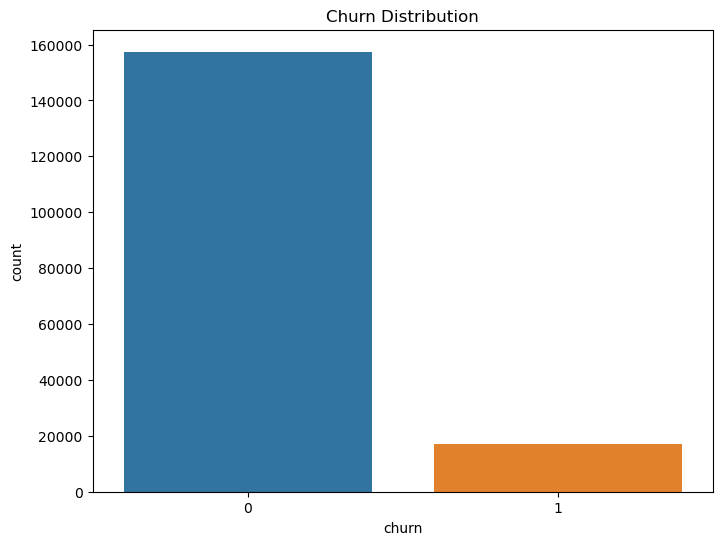

In [21]:
churn_count = merged_data['churn'].value_counts()
plt.figure(figsize=(8,6))
face_t = sns.barplot(x = churn_count.index, y = churn_count.values)
plt.title('Churn Distribution')
plt.xlabel('churn')
plt.ylabel('count')
plt.show()

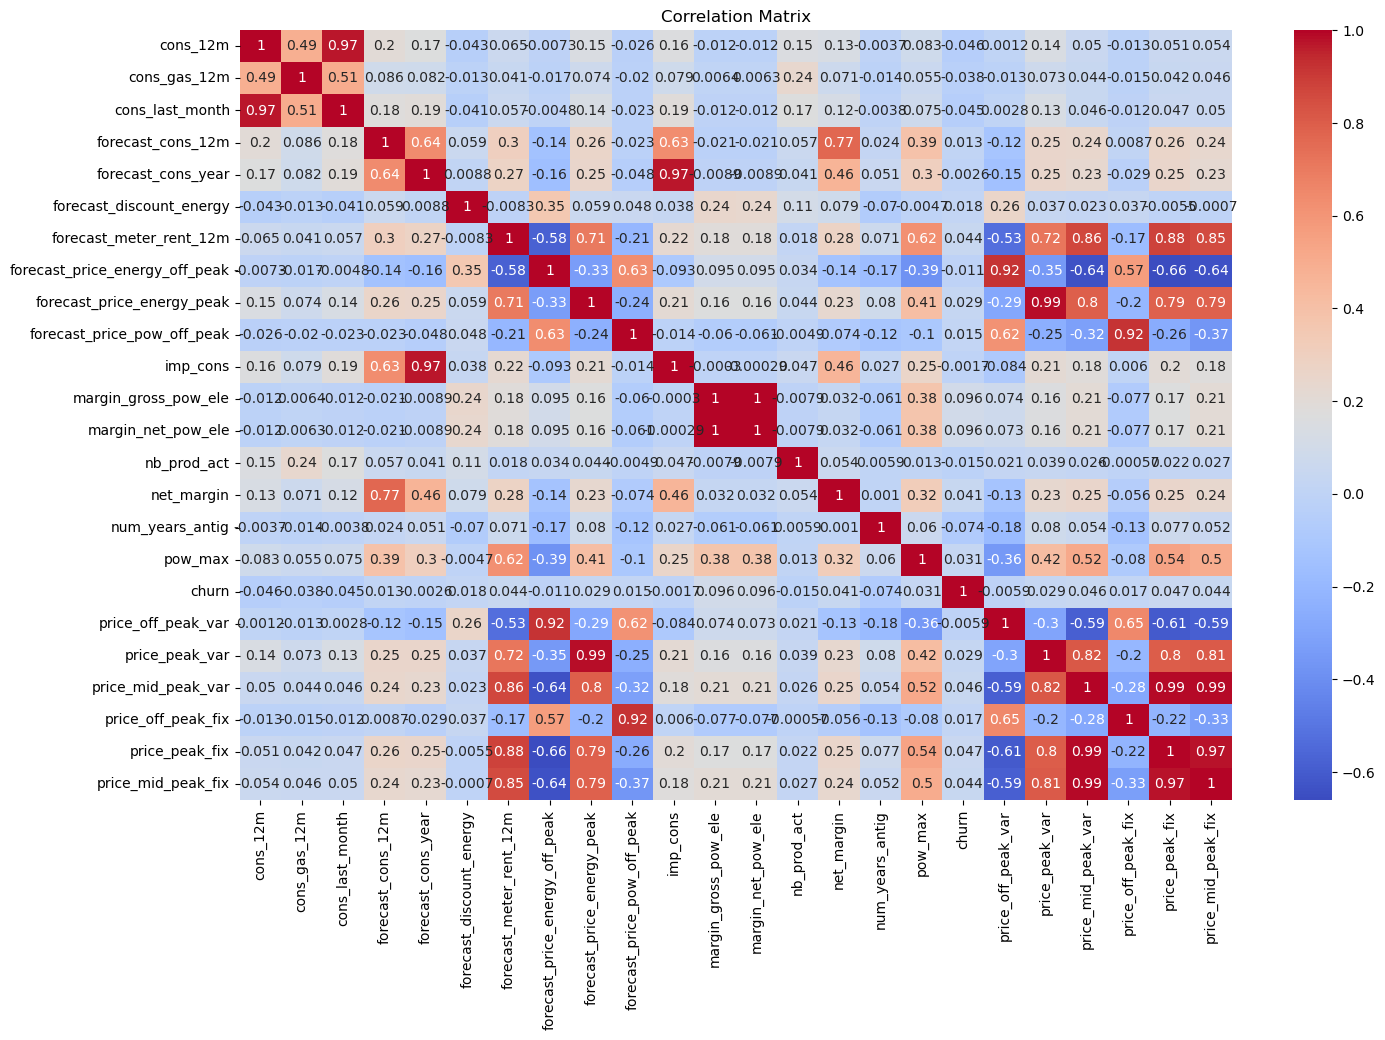

In [22]:
#calculating and visualizing correlations between variables
correlation_matrix = merged_data.corr(numeric_only=True)
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

C:\Users\aniru\AppData\Local\Temp\ipykernel_13448\3368191363.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_tenure['z_score'] = list(abs_tenure_zscores)


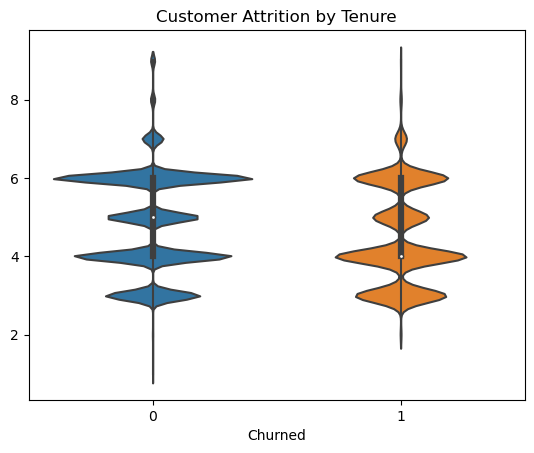

In [23]:
# Calculate the zcores of tenure
tenure_zcores = zscore(a=merged_data['num_years_antig'])
# Convert to absolute values
abs_tenure_zscores = np.abs(tenure_zcores)
# Extract Columns of interest
churn_tenure = merged_data[['churn','num_years_antig']]
# Add z-score column
churn_tenure['z_score'] = list(abs_tenure_zscores)
# Remove outliers 
churned_tenure_filtered = churn_tenure[churn_tenure['z_score'] < 3]
# Visualize tenure by retained customer and churner
vio = sns.violinplot( x=churned_tenure_filtered["churn"], y=churned_tenure_filtered["num_years_antig"] )
# Settings
vio.set(xlabel='Churned', ylabel='')
vio.set_title("Customer Attrition by Tenure")
plt.show()

In [26]:
# Most popular electricty campaign
ele_nm = merged_data.loc[(merged_data['churn']>=0) & (merged_data['net_margin']>0),['id', 'origin_up','net_margin']]

ele_nm.value_counts(subset=['origin_up'])

origin_up                       
lxidpiddsbxsbosboudacockeimpuepw    84378
kamkkxfxxuwbdslkwifmmcsiusiuosws    51071
ldkssxwpmemidmecebumciepifcamkci    36701
usapbepcfoloekilkwsdiboslwaxobdp       24
ewxeelcelemmiwuafmddpobolfuxioce       12
Name: count, dtype: int64

In [28]:
#Selecting current customers with positive net margins
top_customers = merged_data.loc[(merged_data['churn']>=0) & (merged_data['net_margin']>0),['id','num_years_antig','net_margin']]

#Top 10 customers by net margin
top_customers.sort_values(by=['net_margin'],ascending=False).head(10)

id  num_years_antig  net_margin
31136  fb7dcb0f4e0dc4ee54874eab2607c4da                3    24570.65
31146  fb7dcb0f4e0dc4ee54874eab2607c4da                3    24570.65
31137  fb7dcb0f4e0dc4ee54874eab2607c4da                3    24570.65
31138  fb7dcb0f4e0dc4ee54874eab2607c4da                3    24570.65
31139  fb7dcb0f4e0dc4ee54874eab2607c4da                3    24570.65
31140  fb7dcb0f4e0dc4ee54874eab2607c4da                3    24570.65
31141  fb7dcb0f4e0dc4ee54874eab2607c4da                3    24570.65
31142  fb7dcb0f4e0dc4ee54874eab2607c4da                3    24570.65
31143  fb7dcb0f4e0dc4ee54874eab2607c4da                3    24570.65
31144  fb7dcb0f4e0dc4ee54874eab2607c4da                3    24570.65

## Factors contributing to customer churn.
Can we identify any patterns or trends that indicate why customers are leaving? Are there any specific customer segments that are more prone to churn?

### Customer Churn Analysis

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
# Analyzing churn based on selected features
selected_features = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m', 'forecast_cons_year',
                     'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
                     'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas', 'imp_cons',
                     'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig',
                     'origin_up', 'pow_max', 'churn']

churn_analysis_data = merged_data[selected_features]

In [31]:
churn_analysis_data = merged_data[selected_features]

# Removing categorical features from selected features
numeric_features = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m', 'forecast_cons_year',
                    'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
                    'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'imp_cons', 'margin_gross_pow_ele',
                    'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig', 'pow_max']

churn_analysis_data_numeric = churn_analysis_data[numeric_features]

# Calculating descriptive statistical analysis for churned and non-churned customers
churned_customers = churn_analysis_data_numeric[churn_analysis_data['churn'] == 1]
non_churned_customers = churn_analysis_data_numeric[churn_analysis_data['churn'] == 0]

churn_stats = churned_customers.describe().transpose()
non_churn_stats = non_churned_customers.describe().transpose()

In [32]:
import plotly.graph_objects as go
# Create interactive table for churn_stats
fig_churn_stats = go.Figure(data=[go.Table(
    header=dict(values=['Feature', 'Count', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max']),
    cells=dict(values=[churn_stats.index, churn_stats['count'], churn_stats['mean'], churn_stats['std'],
                       churn_stats['min'], churn_stats['25%'], churn_stats['50%'], churn_stats['75%'],
                       churn_stats['max']])
)])

# Create interactive table for non_churn_stats
fig_non_churn_stats = go.Figure(data=[go.Table(
    header=dict(values=['Feature', 'Count', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max']),
    cells=dict(values=[non_churn_stats.index, non_churn_stats['count'], non_churn_stats['mean'], non_churn_stats['std'],
                       non_churn_stats['min'], non_churn_stats['25%'], non_churn_stats['50%'], non_churn_stats['75%'],
                       non_churn_stats['max']])
)])

# Update table layout
fig_churn_stats.update_layout(
    title='Descriptive Statistics for Churned Customers',
    width=800,
    height=400
)

fig_non_churn_stats.update_layout(
    title='Descriptive Statistics for Non-Churned Customers',
    width=800,
    height=400
)

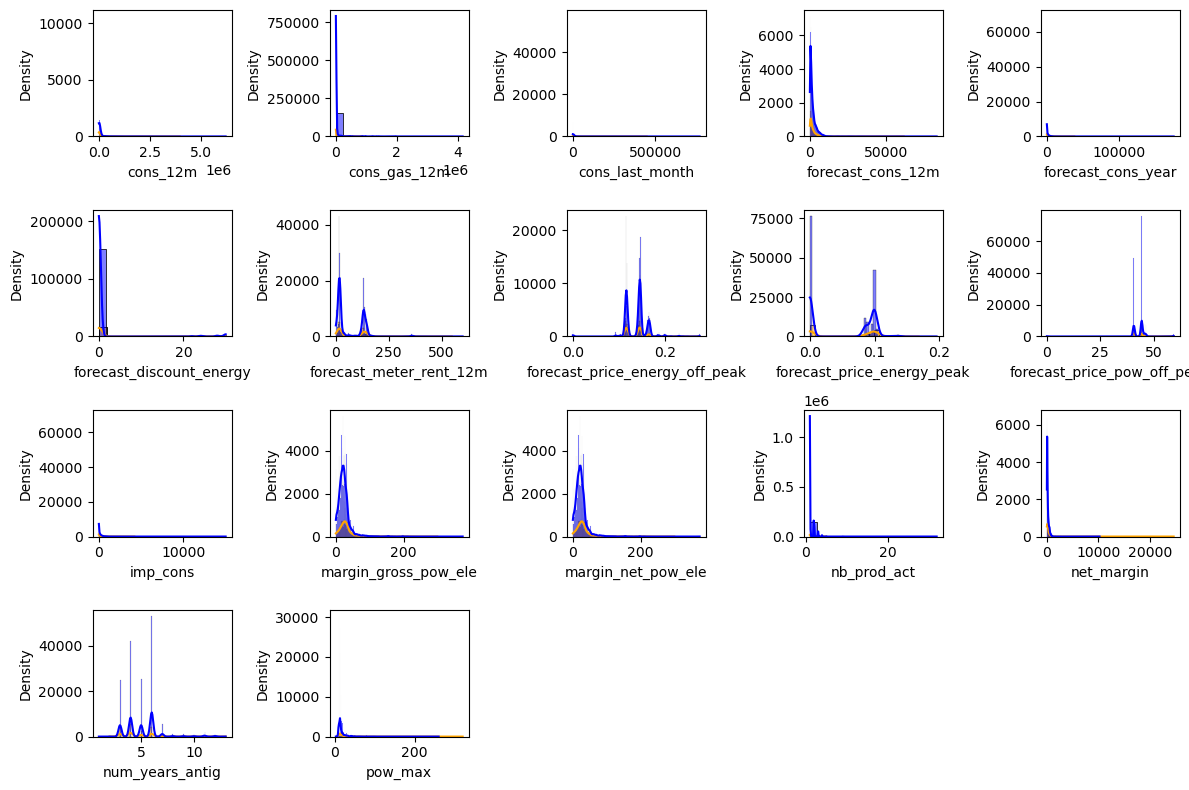

In [33]:
# Visualizing the distribution of selected features for churned and non-churned customers
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numeric_features):
    plt.subplot(4, 5, i + 1)
    sns.histplot(churned_customers[feature], kde=True, color='orange', label='Churned')
    sns.histplot(non_churned_customers[feature], kde=True, color='blue', label='Non-Churned')
    plt.xlabel(feature)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

## Average lifetime value of a customer

How does it differ between different customer segments? Can we identify high-value customers that are worth investing in for long-term relationships?

In [34]:
# Calculate CLV
merged_data['CLV'] = merged_data['net_margin'] * merged_data['num_years_antig']
# Define the minimum CLV threshold for valuable customers
min_clv_threshold = 10000

In [35]:
# Filter the data for valuable customers
valuable_customers = merged_data[merged_data['CLV'] >= min_clv_threshold]

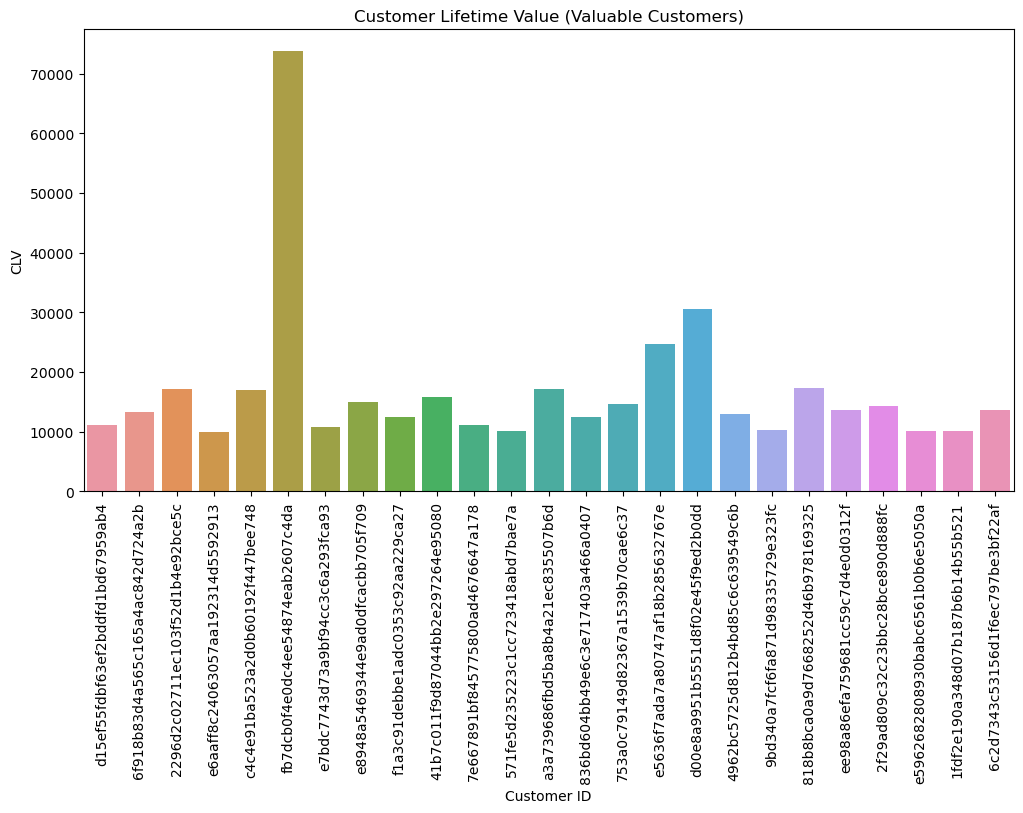

In [36]:
# Bar plot of CLV for valuable customers
plt.figure(figsize=(12, 6))
sns.barplot(data=valuable_customers, x='id', y='CLV')
plt.xticks(rotation=90)
plt.xlabel('Customer ID')
plt.ylabel('CLV')
plt.title('Customer Lifetime Value (Valuable Customers)')
plt.show()

In [37]:
# Table of CLV
clv_table = merged_data[['id', 'CLV']]
clv_table = clv_table.sort_values('CLV', ascending=False)
clv_table = clv_table.reset_index(drop=True)
print(clv_table)

                                      id       CLV
0       fb7dcb0f4e0dc4ee54874eab2607c4da  73711.95
1       fb7dcb0f4e0dc4ee54874eab2607c4da  73711.95
2       fb7dcb0f4e0dc4ee54874eab2607c4da  73711.95
3       fb7dcb0f4e0dc4ee54874eab2607c4da  73711.95
4       fb7dcb0f4e0dc4ee54874eab2607c4da  73711.95
...                                  ...       ...
174377  3dfa5ad8fad5e15add73843841392bb0      0.00
174378  3dfa5ad8fad5e15add73843841392bb0      0.00
174379  3dfa5ad8fad5e15add73843841392bb0      0.00
174380  fca4818fbb93d85be32ae22d1f275989      0.00
174381  25e6dedb8d82fe1e59c80a9edf835725      0.00

[174382 rows x 2 columns]


## Identifying different Customer Segments
Based upon the electricity and gas consumption, are there any specific characteristics or behaviors that distinguish one segment from another?

In [38]:
#Market Segmentation Analysis
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [39]:
# Selecting relevant features for market segmentation
selected_features = ['cons_12m', 'cons_gas_12m', 'forecast_cons_12m', 'forecast_cons_year',
                     'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
                     'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'imp_cons',
                     'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig',
                     'pow_max']

In [40]:
# Subset the data with selected features
segmentation_data = client_data[selected_features].copy()

In [41]:
# Data preprocessing: Standardize the data
scaler = StandardScaler()
segmentation_data_scaled = scaler.fit_transform(segmentation_data)

In [42]:
# Determine the optimal number of clusters using the elbow method
wcss = []
max_clusters = 10
for n_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(segmentation_data_scaled)
    wcss.append(kmeans.inertia_)


C:\Users\aniru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\aniru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\aniru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\aniru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\aniru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of

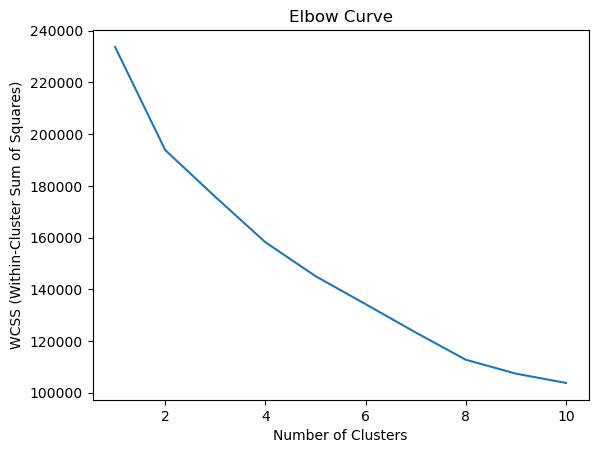

In [43]:
plt.plot(range(1, max_clusters + 1), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Curve')
plt.show()

In [44]:
# Based on the elbow curve, select the optimal number of clusters
optimal_clusters = 4

# Perform K-means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(segmentation_data_scaled)

# Assign cluster labels to the original data
segmentation_data['cluster_label'] = kmeans.labels_

# Analyze the characteristics of each cluster
cluster_stats = segmentation_data.groupby('cluster_label').mean()

# Create a table for cluster statistics
table = PrettyTable()
table.field_names = ['Cluster Label'] + selected_features

# Add rows to the table
for cluster_label, row in cluster_stats.iterrows():
    table.add_row([cluster_label] + list(row))

# Print the table
print(table)

C:\Users\aniru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



+---------------+--------------------+--------------------+--------------------+--------------------+--------------------------+-------------------------+--------------------------------+----------------------------+-----------------------------+--------------------+----------------------+--------------------+--------------------+--------------------+-------------------+--------------------+
| Cluster Label |      cons_12m      |    cons_gas_12m    | forecast_cons_12m  | forecast_cons_year | forecast_discount_energy | forecast_meter_rent_12m | forecast_price_energy_off_peak | forecast_price_energy_peak | forecast_price_pow_off_peak |      imp_cons      | margin_gross_pow_ele | margin_net_pow_ele |    nb_prod_act     |     net_margin     |  num_years_antig  |      pow_max       |
+---------------+--------------------+--------------------+--------------------+--------------------+--------------------------+-------------------------+--------------------------------+-----------------------

## Strategies leading to better customer retention

How does the pricing structure impact customer behavior and consumption patterns?

In [45]:
# Explore Pricing Strategies
pricing_variables = ['price_off_peak_var', 'price_peak_var']
merged_data[pricing_variables].describe()

price_off_peak_var  price_peak_var
count       174382.000000   174382.000000
mean             0.142324        0.052029
std              0.023343        0.050282
min              0.000000        0.000000
25%              0.126595        0.000000
50%              0.146788        0.084213
75%              0.151635        0.102060
max              0.280700        0.229788

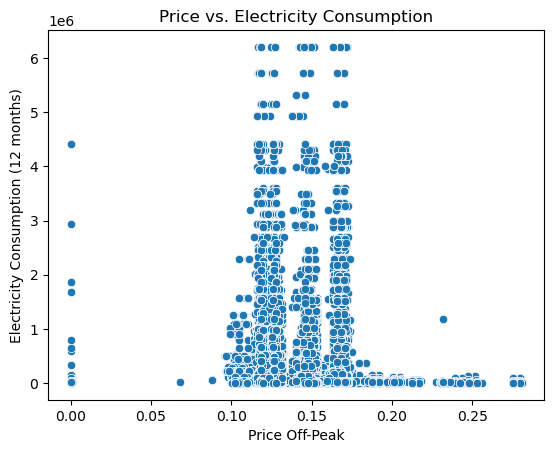

In [46]:
# Study Consumption Patterns
sns.scatterplot(data=merged_data, x='price_off_peak_var', y='cons_12m')
plt.xlabel('Price Off-Peak')
plt.ylabel('Electricity Consumption (12 months)')
plt.title('Price vs. Electricity Consumption')
plt.show()